In [281]:
#conda install -c conda-forge lime

In [282]:
#conda install -c conda-forge eli5

In [283]:
#conda install -c conda-forge rfpimp

[Explaining Feature Importance by example of a Random Forest](https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e)

In [261]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lime
import lime.lime_tabular

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_style("")
sns.set(style="white", color_codes=True)
#sns.set(rc = {'figure.figsize':(15, 10)})

In [47]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

## LOAD

In [298]:
df = pd.read_csv("../data/200418COVID19MEXICO_CLEAN_S.csv")
df.head()

ORIGEN  SECTOR  ENTIDAD_UM  SEXO  ENTIDAD_NAC  ENTIDAD_RES  MUNICIPIO_RES  \
0       2       9          15     1           15           15             37   
1       2      12           9     1           15            9              3   
2       2       9          28     2           16           28             32   
3       2      12           9     2            9            9             13   
4       1       3          15     2           15           15            106   

   TIPO_PACIENTE  INTUBADO  NEUMONIA  ...  INMUSUPR  HIPERTENSION  OTRA_COM  \
0              2         2         1  ...         2             2         2   
1              1        97         2  ...         2             2         2   
2              1        97         2  ...         2             2         2   
3              1        97         2  ...         2             2         2   
4              1        97         2  ...         2             2         2   

   CARDIOVASCULAR  OBESIDAD  RENAL_CRONICA  TABAQUISMO  OTRO_CASO  RESULTADO  \
0               2         2              2           2          2          1   
1               2         1              2           2          2          2   
2               2         2              2           2          1          1   
3               2         2              2           2          1          3   
4               2         1              2           2          1          3   

   DIAS_SINTOMAS_INGRESO  
0                     12  
1                     14  
2                      2  
3                      2  
4                      2  

[5 rows x 26 columns]

In [299]:
df.shape

(48212, 26)

In [300]:
df_copy = df.copy()

In [301]:
df_copy.drop(labels=["ENTIDAD_UM", "ENTIDAD_NAC", "ENTIDAD_RES", "MUNICIPIO_RES", "NACIONALIDAD"], axis=1, inplace=True)

In [303]:
df_copy.columns

Index(['ORIGEN', 'SECTOR', 'SEXO', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'DIAS_SINTOMAS_INGRESO'],
      dtype='object')

In [304]:
X = df_copy[['ORIGEN', 'SECTOR', 'SEXO', 'TIPO_PACIENTE', 'INTUBADO', 'NEUMONIA',
        'EMBARAZO', 'DIABETES', 'EPOC', 'ASMA',
       'INMUSUPR', 'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'RESULTADO',
       'DIAS_SINTOMAS_INGRESO']]

y = df_copy[['EDAD']]

In [311]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.7, random_state = 42)

### Benchmark model

In [312]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

/home/vagrant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [313]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                    rf.oob_score_,
                                                                                    rf.score(X_valid, y_valid)))

R^2 Training Score: 0.60 
OOB Score: 0.18 
R^2 Validation Score: 0.19


### Overall feature importances

In [314]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

feature  feature_importance
0            HIPERTENSION            0.236037
1   DIAS_SINTOMAS_INGRESO            0.148929
2                DIABETES            0.074030
3                  SECTOR            0.067988
4               RESULTADO            0.060088
5               OTRO_CASO            0.053853
6                    EPOC            0.045284
7                  ORIGEN            0.041124
8                NEUMONIA            0.036526
9                INTUBADO            0.028694
10             TABAQUISMO            0.028413
11               OTRA_COM            0.025441
12               EMBARAZO            0.025067
13                   SEXO            0.024107
14               OBESIDAD            0.021473
15          TIPO_PACIENTE            0.019835
16                   ASMA            0.019202
17               INMUSUPR            0.016507
18         CARDIOVASCULAR            0.016198
19          RENAL_CRONICA            0.011206

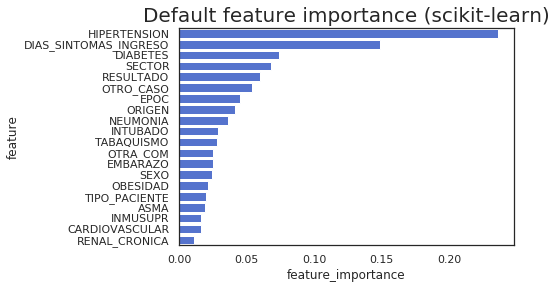

In [315]:
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

### Permutation feature importance

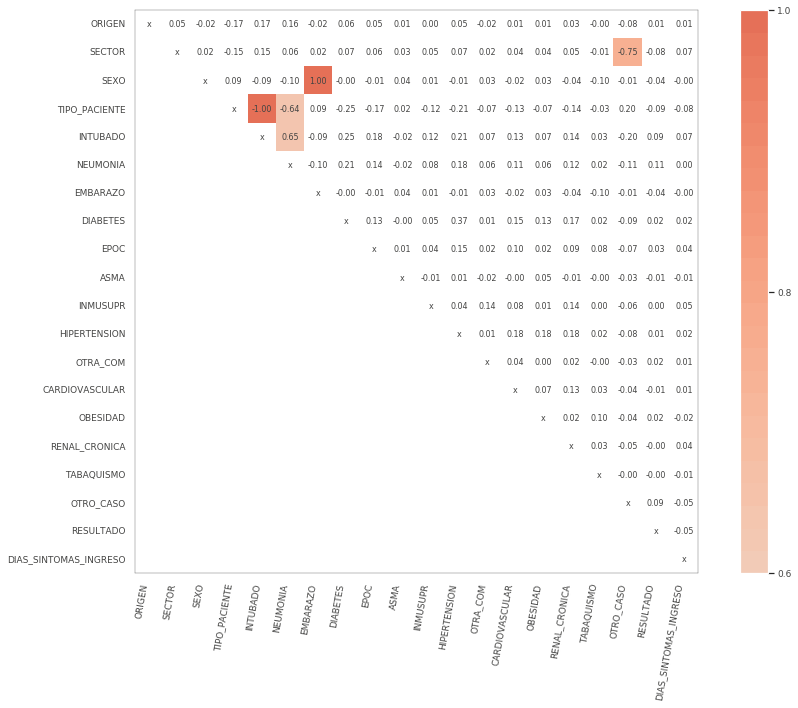

In [316]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(X_train, figsize=(15,10))
viz.view()

In [317]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(rf, X_train, y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

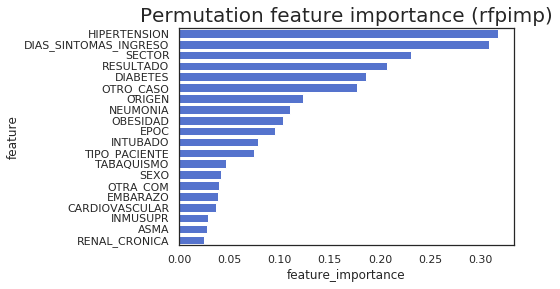

In [318]:
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')

### eli5

In [319]:
import eli5
from eli5.sklearn import PermutationImportance

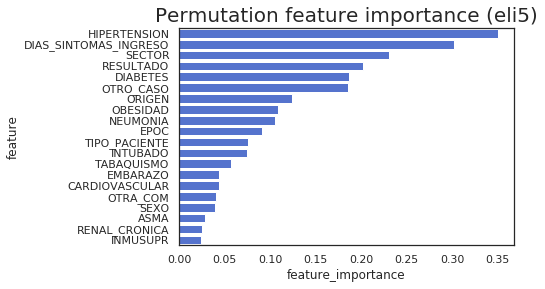

In [320]:
perm = PermutationImportance(rf, cv = None, refit = False, n_iter = 50).fit(X_train, y_train)
perm_imp_eli5 = imp_df(X_train.columns, perm.feature_importances_)
var_imp_plot(perm_imp_eli5, 'Permutation feature importance (eli5)')

In [321]:
eli5.show_weights(perm)

### Drop Column feature importance

In [322]:
from sklearn.base import clone 

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    # list for storing feature importances
    importances = []
    
    # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

/home/vagrant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/home/vagrant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/vagrant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/vagrant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/vagrant/

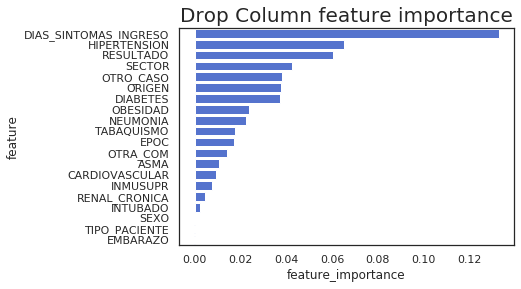

In [323]:
drop_imp = drop_col_feat_imp(rf, X_train, y_train)
var_imp_plot(drop_imp, 'Drop Column feature importance')

### LIME

In [324]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   mode = 'regression',
                                                   feature_names = X_train.columns,
                                                   categorical_features=[3], 
                                                   categorical_names=['CHAS'], 
                                                   discretize_continuous = True)

In [325]:
np.random.seed(42)
exp = explainer.explain_instance(X_train.values[31], rf.predict, num_features=5)
exp.show_in_notebook(show_all=False) #only the features used in the explanation are displayed

np.random.seed(42)
exp = explainer.explain_instance(X_train.values[85], rf.predict, num_features=5)
exp.show_in_notebook(show_all=False)

## COMPARE

In [326]:
drop_imp.columns

Index(['feature', 'feature_importance'], dtype='object')

In [327]:
drop_imp["rank_importance"] = drop_imp.index + 1
drop_imp.head()

feature  feature_importance  rank_importance
0  DIAS_SINTOMAS_INGRESO            0.132779                1
1           HIPERTENSION            0.065099                2
2              RESULTADO            0.060427                3
3                 SECTOR            0.042594                4
4              OTRO_CASO            0.038164                5

In [328]:
drop_imp.shape

(20, 3)

In [329]:
perm_imp_eli5.columns

Index(['feature', 'feature_importance'], dtype='object')

In [330]:
perm_imp_eli5["rank_importance"] = perm_imp_eli5.index + 1
perm_imp_eli5.head()

feature  feature_importance  rank_importance
0           HIPERTENSION            0.350415                1
1  DIAS_SINTOMAS_INGRESO            0.301746                2
2                 SECTOR            0.230561                3
3              RESULTADO            0.202377                4
4               DIABETES            0.186501                5

In [331]:
perm_imp_eli5.shape

(20, 3)

In [332]:
perm_imp_rfpimp.columns

Index(['feature', 'feature_importance'], dtype='object')

In [333]:
perm_imp_rfpimp["rank_importance"] = perm_imp_rfpimp.index + 1
perm_imp_rfpimp.head()

feature  feature_importance  rank_importance
0           HIPERTENSION            0.317384                1
1  DIAS_SINTOMAS_INGRESO            0.308155                2
2                 SECTOR            0.231165                3
3              RESULTADO            0.206977                4
4               DIABETES            0.185778                5

In [334]:
perm_imp_rfpimp.shape

(20, 3)

In [335]:
base_imp.columns

Index(['feature', 'feature_importance'], dtype='object')

In [336]:
base_imp["rank_importance"] = base_imp.index + 1
base_imp.head()

feature  feature_importance  rank_importance
0           HIPERTENSION            0.236037                1
1  DIAS_SINTOMAS_INGRESO            0.148929                2
2               DIABETES            0.074030                3
3                 SECTOR            0.067988                4
4              RESULTADO            0.060088                5

In [337]:
base_imp.shape

(20, 3)

In [338]:
df_01 = pd.merge(base_imp[["feature", "rank_importance"]], 
         perm_imp_rfpimp[["feature", "rank_importance"]], 
         on=["feature"], 
         suffixes=('_base_imp', '_perm_imp_rfpimp'))

df_01.head()

feature  rank_importance_base_imp  \
0           HIPERTENSION                         1   
1  DIAS_SINTOMAS_INGRESO                         2   
2               DIABETES                         3   
3                 SECTOR                         4   
4              RESULTADO                         5   

   rank_importance_perm_imp_rfpimp  
0                                1  
1                                2  
2                                5  
3                                3  
4                                4

In [339]:
df_02 = pd.merge(df_01, 
         perm_imp_eli5[["feature", "rank_importance"]], 
         on=["feature"])

df_02["rank_importance_perm_imp_eli5"] = df_02["rank_importance"]
df_02.drop(labels=["rank_importance"], axis=1, inplace=True)
df_02.head()

feature  rank_importance_base_imp  \
0           HIPERTENSION                         1   
1  DIAS_SINTOMAS_INGRESO                         2   
2               DIABETES                         3   
3                 SECTOR                         4   
4              RESULTADO                         5   

   rank_importance_perm_imp_rfpimp  rank_importance_perm_imp_eli5  
0                                1                              1  
1                                2                              2  
2                                5                              5  
3                                3                              3  
4                                4                              4

In [340]:
df_03 = pd.merge(df_02, 
         drop_imp[["feature", "rank_importance"]], 
         on=["feature"])

df_03["rank_importance_drop_imp"] = df_03["rank_importance"]
df_03.drop(labels=["rank_importance"], axis=1, inplace=True)
df_03.head()

feature  rank_importance_base_imp  \
0           HIPERTENSION                         1   
1  DIAS_SINTOMAS_INGRESO                         2   
2               DIABETES                         3   
3                 SECTOR                         4   
4              RESULTADO                         5   

   rank_importance_perm_imp_rfpimp  rank_importance_perm_imp_eli5  \
0                                1                              1   
1                                2                              2   
2                                5                              5   
3                                3                              3   
4                                4                              4   

   rank_importance_drop_imp  
0                         2  
1                         1  
2                         7  
3                         4  
4                         3

In [341]:
df_03[["rank_importance_base_imp", "rank_importance_perm_imp_rfpimp", "rank_importance_perm_imp_eli5", "rank_importance_drop_imp"]].iloc[0]

rank_importance_base_imp           1
rank_importance_perm_imp_rfpimp    1
rank_importance_perm_imp_eli5      1
rank_importance_drop_imp           2
Name: 0, dtype: int64

In [342]:
cols = ["rank_importance_base_imp", "rank_importance_perm_imp_rfpimp", "rank_importance_perm_imp_eli5", "rank_importance_drop_imp"]
l = []
for row in df_03[cols].index:
#    print(df_03.name)
#    print(df_03[cols].iloc[row].mode().values[0])
    l.append(df_03[cols].iloc[row].mode().values[0])

In [344]:
#df_03.drop(labels=["rank"], axis=1, inplace=True)

In [345]:
df_03["importance"] = l

In [346]:
df_03.head()

feature  rank_importance_base_imp  \
0           HIPERTENSION                         1   
1  DIAS_SINTOMAS_INGRESO                         2   
2               DIABETES                         3   
3                 SECTOR                         4   
4              RESULTADO                         5   

   rank_importance_perm_imp_rfpimp  rank_importance_perm_imp_eli5  \
0                                1                              1   
1                                2                              2   
2                                5                              5   
3                                3                              3   
4                                4                              4   

   rank_importance_drop_imp  importance  
0                         2           1  
1                         1           2  
2                         7           5  
3                         4           3  
4                         3           4

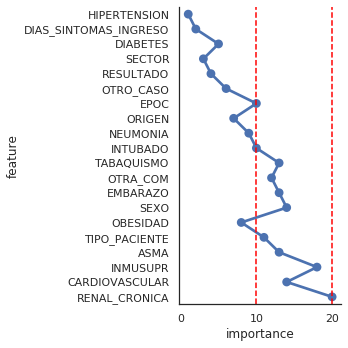

In [347]:
sns.catplot(x="importance", y="feature", kind="point", color="b", data=df_03)
plt.axvline(x=10, color='red', linestyle='--') 
plt.axvline(x=20, color='red', linestyle='--') 
plt.savefig("fig.png")

In [348]:
df_03.to_csv("../data/df_03.csv", index=False)